In [2]:
!earthengine authenticate

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Running command using Cloud API.  Set --no-use_cloud_api to go back to using the API

/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=L3_8bhrE1Qka7SNGJlmLW2hG6eijuOpT9buDEKDXjbE&code_cha

In [0]:
%matplotlib inline

In [0]:
from IPython.display import Image
import ee, datetime
import pandas as pd
from pylab import *
import seaborn as sns
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

ee.Initialize()

In [0]:
# Set start and end date
startTime = datetime.datetime(2013, 1, 1)
endTime = datetime.datetime(2015, 12, 31)

# Create image collection
collection = ee.ImageCollection("LANDSAT/LC8_L1T_TOA").filterDate(startTime, endTime)
# Other bounds to filter by: filter.Metadata('CLOUD_COVER', 'less_than', 1)
# Create point in Luxembourg
point = {'type':'Point', 'coordinates':[6.134136, 49.612485]};

In [0]:
info = collection.getRegion(point,500).getInfo()

In [0]:
# Reshape image collection 
header = info[0]
data = array(info[1:])

iTime = header.index('time')
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
band_list = ['B5','B4']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)

# Calculate NDVI
B5 = yData[:,0] #selecting NIR band
B4 = yData[:,1] #selecting RED band
ndvi = (B5 - B4) / (B4 + B5)

In [0]:
# Reformat Dataframe
df = pd.DataFrame(data=ndvi, index=list(range(len(ndvi))), columns=['NDVI'])
df = df.interpolate()
df['Date'] = pd.Series(time, index=df.index)
df = df.set_index(df.Date)
df.index = pd.to_datetime(df.index)
df['NDVI']=df['NDVI'].fillna(0)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 2013-07-14 10:23:52.714000 to 2015-12-02 10:28:37.021000
Data columns (total 2 columns):
NDVI    159 non-null float64
Date    159 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


In [103]:
df.describe()

,NDVI
count,159.000000
mean,0.145804
std,0.110957
min,0.010264
25%,0.059133
50%,0.108459
75%,0.206415
max,0.507643


Text(0, 0.5, 'NVDI')

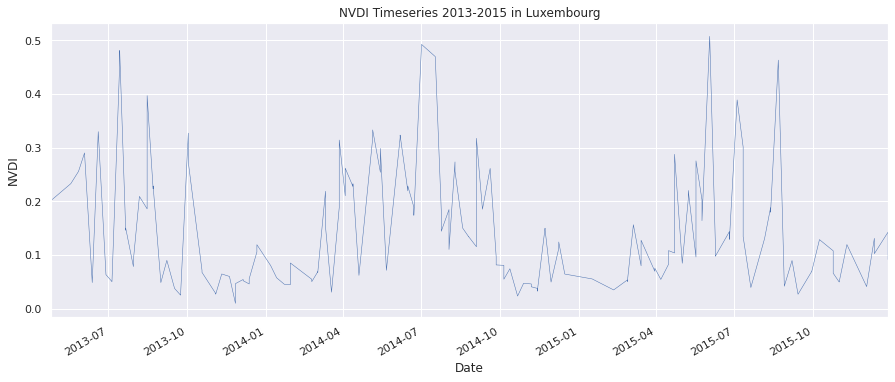

In [105]:
# Plot NVDI timeseries
sns.set(rc={'figure.figsize':(15, 6)})
ax = df['NDVI'].plot(linewidth=0.5, title = "NVDI Timeseries 2013-2015 in Luxembourg");
ax.set_ylabel("NVDI")